# SimpleHouseSlab notebook example

In this example, a rule based controller is used to control the model "SimpleHouseSlab-v0". At first we import the controller:

In [1]:
#from energym.examples.Controller import LabController

Next, we import Energym and create the simulation environment by specifying the model, a weather file and the number of simulation days.

In [2]:
import energym

#weather = "ESP_CT_Barcelona"
env = energym.make("SimpleHouseSlab-v0", simulation_days=20)

The control inputs can be inspected using the `get_inputs_names()` method and to construct a controller, we pass the list of inputs and further parameters. This controller determines inputs to get close to the temperature setpoints and uses fixed setpoints during the night.

In [3]:
inputs = env.get_inputs_names()[:] # exclude battery setpoints
print(inputs)
#controller = LabController(control_list=inputs, lower_tol=0.3, upper_tol=0.8, nighttime_setback=True, nighttime_start=18, nighttime_end=6, nighttime_temp=18)

['u']


To run the simulation, a number of steps is specified (here 288 steps per day for 10 days) and the obtained control inputs are passed to the simulation model with the `step()` method. To generate some plots later on, we save all the inputs and outputs in lists.

In [4]:
from scipy import signal

steps = 288*10
out_list = []
outputs = env.get_output()
controls = []
hour = 0
for i in range(steps):
    #control = controller.get_control(outputs, 21, hour)
    control = {}
    control['u'] = [0.5*(signal.square(0.1*i)+1.0)]
    controls +=[ {p:control[p][0] for p in control} ]
    outputs = env.step(control)
    _,hour,_,_ = env.get_date()
    out_list.append(outputs)

[OK] %s
[WARNING] %s


Since the inputs and outputs are given as dictionaries and are collected in lists, we can simply load them as a pandas.DataFrame.

In [5]:
import pandas as pd
out_df = pd.DataFrame(out_list)

In [6]:
out_df

,TOut.T,heaPum.COP,heaPum.COPCar,heaPum.P,heaPum.QCon_flow,heaPum.QEva_flow,heaPum.TConAct,heaPum.TEvaAct,preHea.Q_flow,sla.m_flow,sla.surf_a.Q_flow,sla.surf_a.T,sla.surf_b.Q_flow,sla.surf_b.T,sunHea.Q_flow,temRet.T,temRoo.T,temSup.T,y,time
0,281.769647,4.750082,9.996466,5000.0,2.375041e+04,-1.875041e+04,307.245654,276.510226,0.0,1.0,-510.109269,293.119942,-124.965871,293.147270,0.0,298.824326,292.992415,305.332222,292.992415,300.0
1,281.739409,4.428767,9.320263,5000.0,2.214383e+04,-1.714383e+04,310.406294,277.101836,0.0,1.0,-937.118483,293.083958,-124.934239,293.144739,0.0,302.305897,292.849678,308.626636,292.849678,600.0
2,281.709272,4.242011,8.927238,5000.0,2.121005e+04,-1.621005e+04,312.439975,277.441472,0.0,1.0,-1455.399476,293.085992,-124.904782,293.142383,0.0,304.541950,292.722142,310.737636,292.722142,900.0
3,281.679220,4.117682,8.665590,5000.0,2.058841e+04,-1.558841e+04,313.887877,277.665546,0.0,1.0,-2098.748634,293.137669,-124.877275,293.140182,0.0,306.136282,292.612981,312.236690,292.612981,1200.0
4,281.649238,4.026463,8.473621,5000.0,2.013231e+04,-1.513231e+04,315.003512,277.828908,0.0,1.0,-2836.632906,293.234369,-124.851566,293.138125,0.0,307.366638,292.525211,313.389655,292.525211,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,270.774889,3.688825,7.763068,0.0,-2.646978e-23,2.646978e-23,325.017092,283.150000,0.0,0.0,-9528.216618,297.795675,-220.576240,300.796099,0.0,319.771744,295.413620,325.016672,295.413620,862800.0
2876,270.749500,3.688825,7.763068,0.0,-2.646978e-23,2.646978e-23,325.017092,283.150000,0.0,0.0,-9264.379043,297.644279,-220.592745,300.797420,0.0,319.771744,295.328185,325.016672,295.328185,863100.0
2877,270.725000,3.688825,7.763068,0.0,-2.646978e-23,2.646978e-23,325.017092,283.150000,0.0,0.0,-9022.423444,297.491871,-220.608671,300.798694,0.0,319.771744,295.236265,325.016672,295.236265,863400.0
2878,270.701722,3.688825,7.763068,0.0,-2.646978e-23,2.646978e-23,325.017092,283.150000,0.0,0.0,-8800.410827,297.338682,-220.623966,300.799917,0.0,319.771744,295.138579,325.016672,295.138579,863700.0


To generate plots, we can directly get the data from the DataFrames, by using the key names. Displayed are the zone temperatures and the setpoints determined by the controller for zone 1 as well as the corresponding heat pump on/off switching, the external temperature, and the total power demand.

<IPython.core.display.Javascript object>


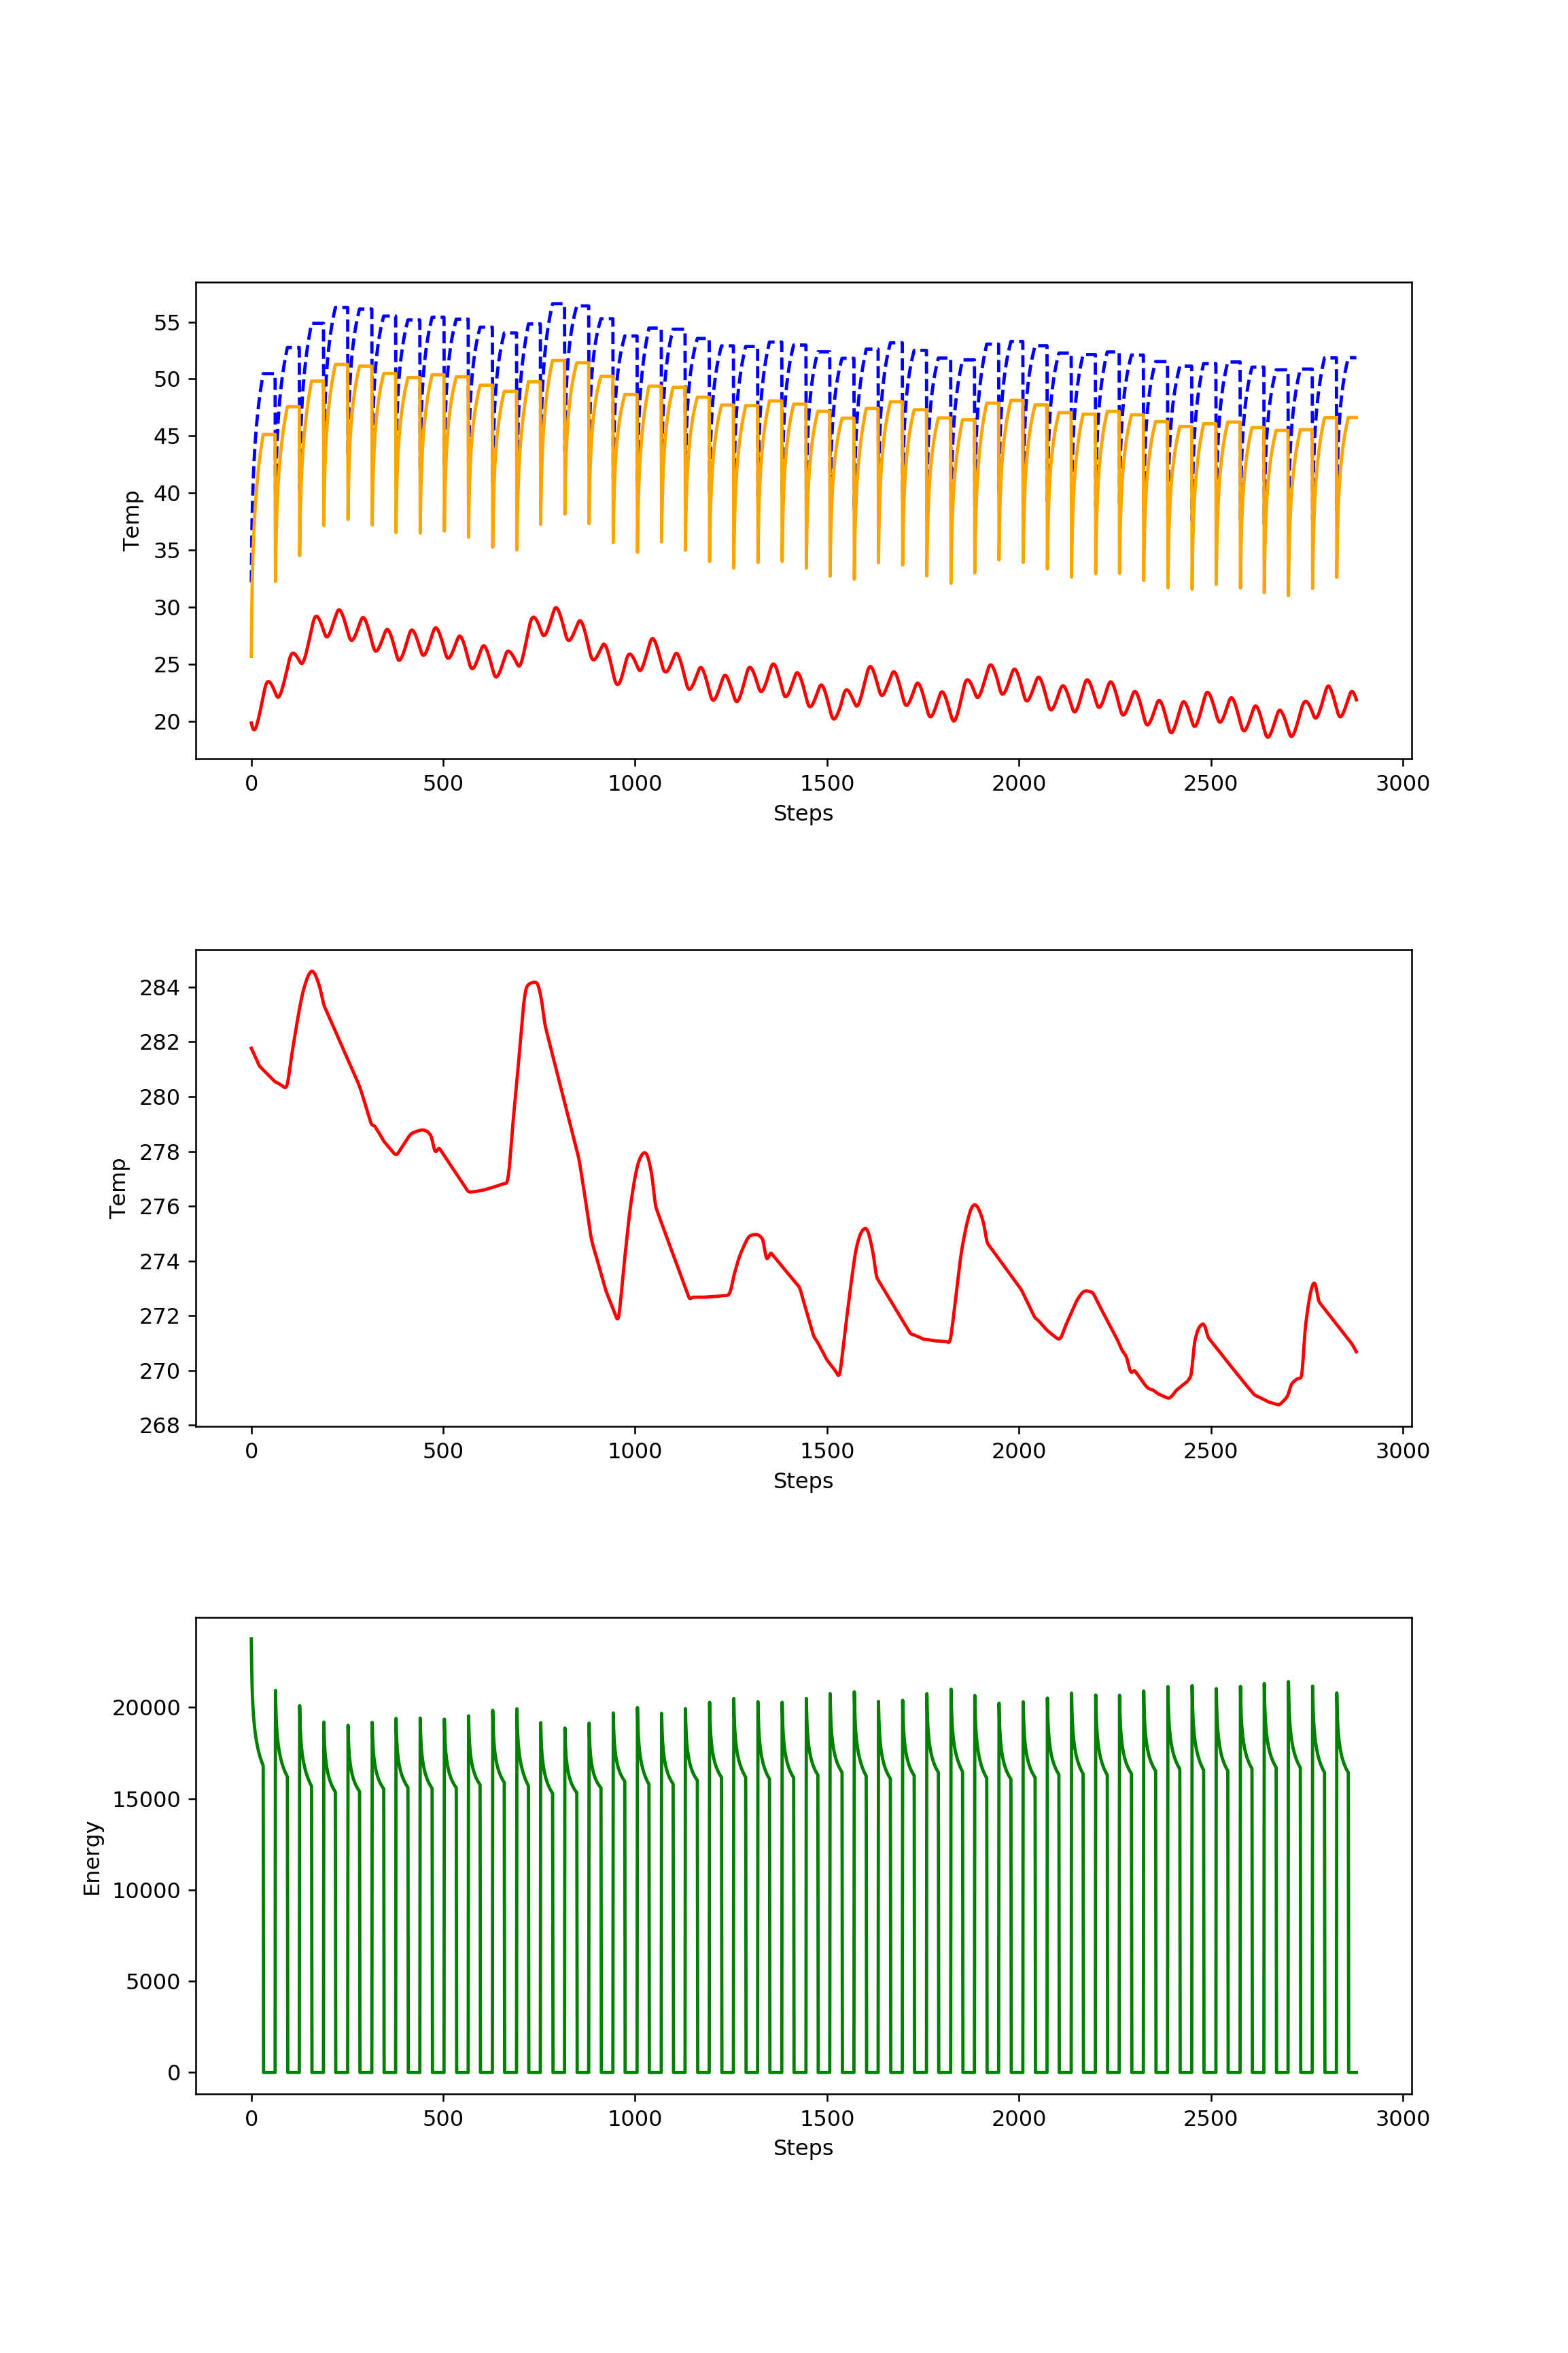

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

f, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,15))#


ax1.plot(out_df['temRoo.T']-273.15, 'r')
ax1.plot(out_df['temSup.T']-273.15, 'b--')
ax1.plot(out_df['temRet.T']-273.15, 'orange')
ax1.set_ylabel('Temp')
ax1.set_xlabel('Steps')

ax2.plot(out_df['TOut.T'], 'r')
ax2.set_ylabel('Temp')
ax2.set_xlabel('Steps')

ax3.plot(out_df['heaPum.QCon_flow'], 'g')
ax3.set_ylabel('Energy')
ax3.set_xlabel('Steps')

plt.subplots_adjust(hspace=0.4)

plt.show()

To end the simulation, the `close()` method is called. It deletes files that were produced during the simulation and stores some information about the simulation in the *runs* folder.

In [7]:
env.close()

[OK] fmiTerminateSlave: fmiFreeInstanceSlave must be called to free the FMU instance.

[OK] fmiFreeSlaveInstance: The function fmiFreeSlaveInstance of instance %s is executed.

[OK] freeInstanceResources: %s will be freed.



In [10]:
env.get_outputs_names()

['TOut.T',
 'heaPum.COP',
 'heaPum.COPCar',
 'heaPum.P',
 'heaPum.QCon_flow',
 'heaPum.QEva_flow',
 'heaPum.TConAct',
 'heaPum.TEvaAct',
 'preHea.Q_flow',
 'sla.m_flow',
 'sla.surf_a.Q_flow',
 'sla.surf_a.T',
 'sla.surf_b.Q_flow',
 'sla.surf_b.T',
 'sunHea.Q_flow',
 'temRet.T',
 'temRoo.T',
 'temSup.T',
 'y']

In [11]:
env.get_forecast()

{'Dry Bulb Temperature Prediction': [-2.5372301092453027,
  -2.7448936772011563,
  -2.9435239549048386,
  -2.996898292688683,
  -3.0462979827615726,
  -3.0917230251235064,
  -3.087232460540256,
  -4.069177191494049,
  -3.7417562744957458,
  -1.545603336384553,
  0.2671354507645174,
  1.808648391173615,
  3.3705290130344325,
  4.362431423041977,
  4.902049716068855,
  4.599992526947965,
  3.1659169004308207,
  2.307036557858934,
  1.4542802587851338,
  0.619333541732679,
  -0.22121719842479506,
  -1.0556438950841824,
  -1.8723885939617682,
  -2.6946097317048285],
 'Direct Normal Radiation Prediction': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  260.5379345378152,
  256.0883248755978,
  294.2920644970109,
  450.8960011123757,
  619.4816873857111,
  522.4838429158726,
  22.4882304845794,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}